<a href="https://colab.research.google.com/github/404himel/ML/blob/main/diabetes_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

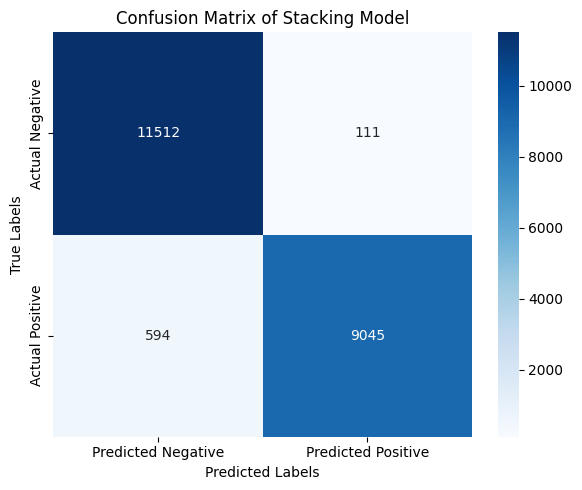

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values for the Stacking model
conf_matrix = np.array([[11512, 111],
                        [594, 9045]])

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix of Stacking Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.savefig("Conf.png")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/archive(1).zip')
zip.extractall()
zip.close()

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.duplicated().sum()

np.int64(3854)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(96146, 9)

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,87664
1,8482


In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
len(df[df['smoking_history']=='No Info'])

32887

In [ ]:
df.shape

(96146, 9)

In [ ]:
df.drop(df[df['smoking_history']=='No Info'].index,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3229 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               3229 non-null   object 
 1   age                  3229 non-null   float64
 2   hypertension         3229 non-null   int64  
 3   heart_disease        3229 non-null   int64  
 4   smoking_history      3229 non-null   object 
 5   bmi                  3229 non-null   float64
 6   HbA1c_level          3229 non-null   float64
 7   blood_glucose_level  3229 non-null   int64  
 8   diabetes             3229 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 252.3+ KB


In [ ]:
col = df.select_dtypes(include=['object']).columns
col


Index(['gender', 'smoking_history'], dtype='object')

In [ ]:
col_num = df.select_dtypes(include=['int64','float64']).columns
col_num

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

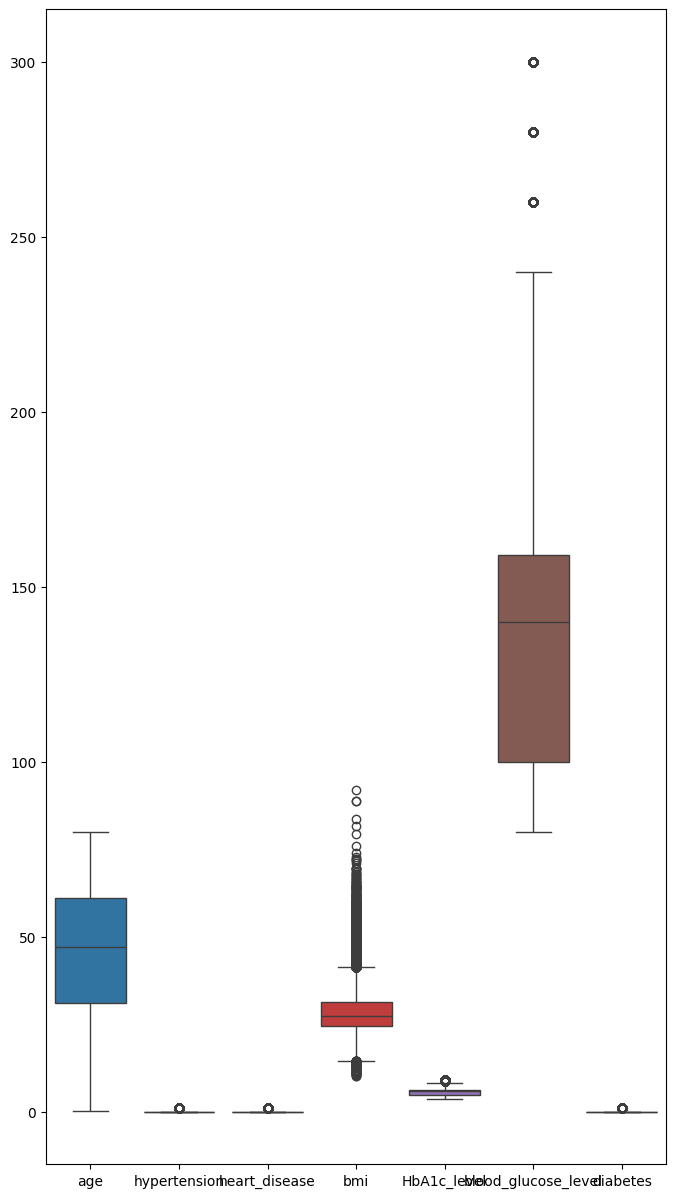

In [ ]:
plt.figure(figsize=(8,15))
sns.boxplot(data=df[col_num])
plt.show()

In [ ]:
col_for_outlier = ['bmi','HbA1c_level','blood_glucose_level']

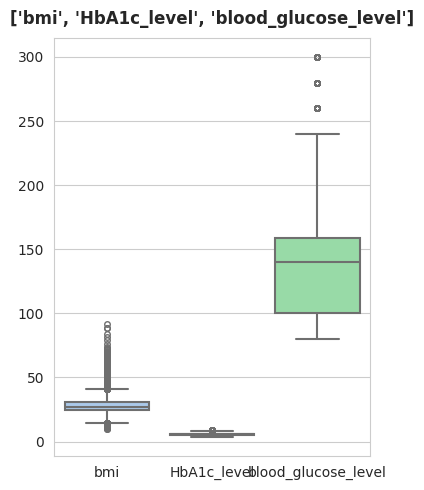

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 5))  # reduced figure size
sns.set_style("whitegrid")  # clean grid background

sns.boxplot(
    data=df[col_for_outlier],
    palette="pastel",     # softer modern color
    linewidth=1.5,        # thinner lines for smaller plot
    fliersize=4           # slightly smaller outlier dots
)

plt.title(f'{col_for_outlier}', fontsize=12, fontweight='semibold', pad=10)
plt.xlabel('')
plt.ylabel('')

plt.xticks(fontsize=10, rotation=0)  # no rotation unless needed
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


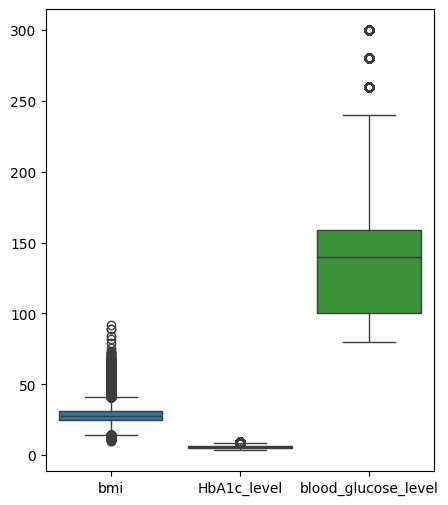

In [ ]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df[col_for_outlier])
#plt.savefig('before_outlier.png')
plt.show()

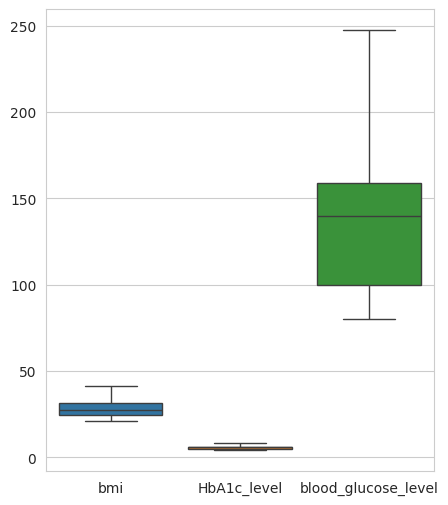

In [ ]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df[col_for_outlier])
plt.savefig('after_outlier.png')
plt.show()

In [ ]:
per_25 = df['bmi'].quantile(.25)
per_75 = df['bmi'].quantile(.75)
iqr = per_75 - per_25
upper_limit = per_75 + 1.5*iqr
lower_limit = per_75 - 1.5*iqr
print(upper_limit)
print(lower_limit)

41.2275
21.1725


In [ ]:
df['bmi'] = np.where(
    df['bmi'] > upper_limit,
    upper_limit,
    np.where(
        df['bmi'] < lower_limit,
        lower_limit,
        df['bmi']
    )
)


In [ ]:
per_25 = df['HbA1c_level'].quantile(.25)
per_75 = df['HbA1c_level'].quantile(.75)
iqr = per_75 - per_25
upper_limit = per_75 + 1.5*iqr
lower_limit = per_75 - 1.5*iqr
print(upper_limit)
print(lower_limit)

df['HbA1c_level'] = np.where(
    df['HbA1c_level'] > upper_limit,
    upper_limit,
    np.where(
        df['HbA1c_level'] < lower_limit,
        lower_limit,
        df['HbA1c_level']
    )
)


8.3
4.1


In [ ]:
per_25 = df['blood_glucose_level'].quantile(.25)
per_75 = df['blood_glucose_level'].quantile(.75)
iqr = per_75 - per_25
upper_limit = per_75 + 1.5*iqr
lower_limit = per_75 - 1.5*iqr
print(upper_limit)
print(lower_limit)

df['blood_glucose_level'] = np.where(
    df['blood_glucose_level'] > upper_limit,
    upper_limit,
    np.where(
        df['blood_glucose_level'] < lower_limit,
        lower_limit,
        df['blood_glucose_level']
    )
)


247.5
70.5


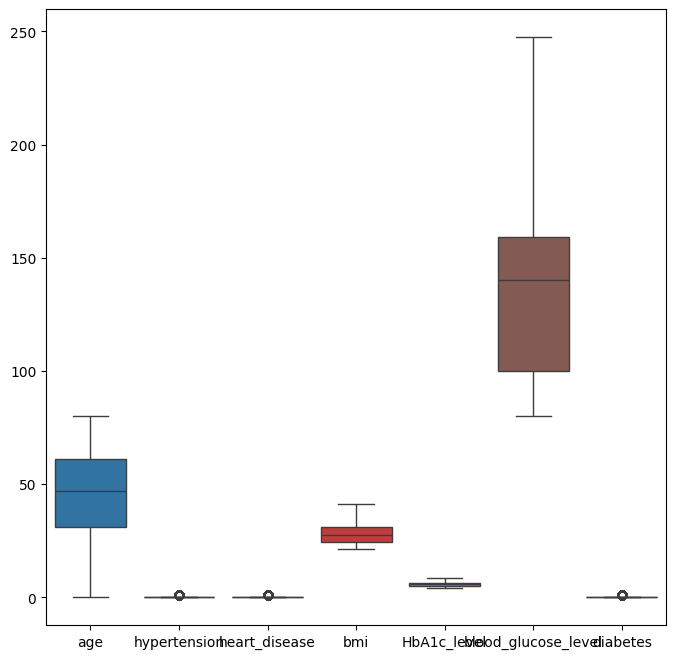

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df[col_num])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label_converter():
  for i in df.select_dtypes(include='object').columns:
    df[i] = le.fit_transform(df[i])
  return df

label_converter()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.1900,6.6,140.0,0
2,1,28.0,0,0,3,27.3200,5.7,158.0,0
3,0,36.0,0,0,0,23.4500,5.0,155.0,0
4,1,76.0,1,1,0,21.1725,4.8,155.0,0
5,0,20.0,0,0,3,27.3200,6.6,85.0,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,3,34.3400,6.5,160.0,0
99993,0,40.0,0,0,3,40.6900,4.1,155.0,0
99997,1,66.0,0,0,2,27.8300,5.7,155.0,0
99998,0,24.0,0,0,3,35.4200,4.1,100.0,0


In [ ]:
for i in df.select_dtypes(include='float64').columns:
  df[i]  = df[i].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63259 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gender               63259 non-null  int64
 1   age                  63259 non-null  int64
 2   hypertension         63259 non-null  int64
 3   heart_disease        63259 non-null  int64
 4   smoking_history      63259 non-null  int64
 5   bmi                  63259 non-null  int64
 6   HbA1c_level          63259 non-null  int64
 7   blood_glucose_level  63259 non-null  int64
 8   diabetes             63259 non-null  int64
dtypes: int64(9)
memory usage: 4.8 MB


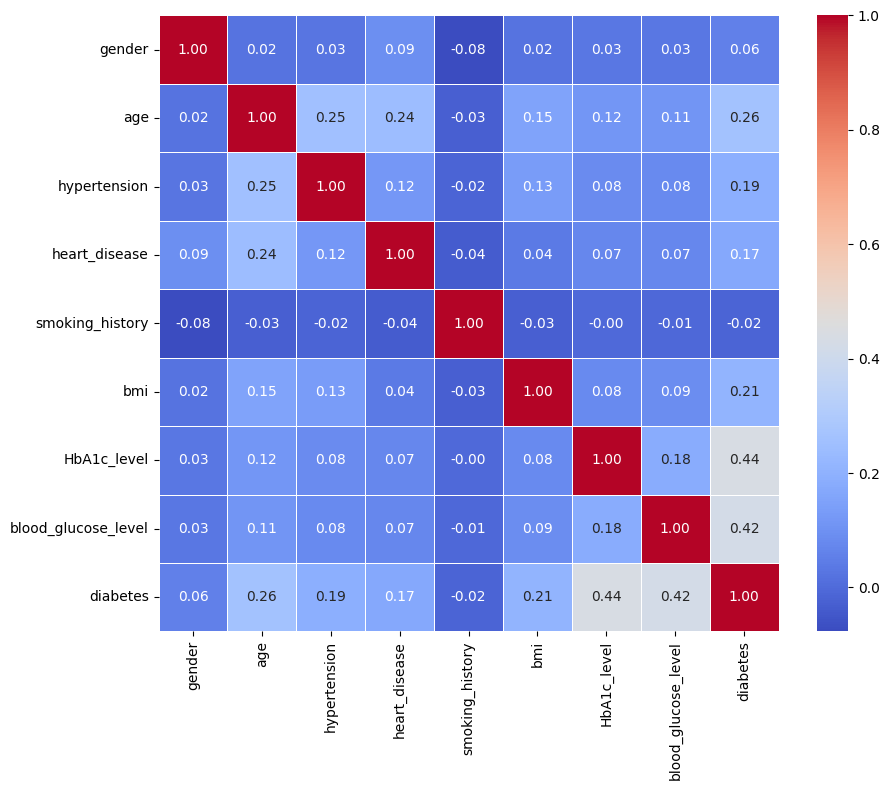

diabetes               1.000000
HbA1c_level            0.438362
blood_glucose_level    0.420051
age                    0.262464
bmi                    0.205051
hypertension           0.191552
heart_disease          0.169052
gender                 0.056194
smoking_history       -0.016899
Name: diabetes, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = df.corr()
cor_sorted = cor['diabetes'].sort_values(ascending=False)


plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.savefig('diabetes_correlation_heatmap.png')

plt.show()

print(cor_sorted)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['diabetes'],axis=1)
y=df['diabetes']
X, y = oversample.fit_resample(X, y)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

In [ ]:
X.shape

(112444, 5)

In [ ]:
comp = pca.components_
comp

array([[ 5.55213551e-04,  1.06905853e-01,  1.06451271e-03,
         7.07413077e-04, -3.70398875e-04,  2.11089154e-02,
         7.53575917e-03,  9.94015435e-01],
       [ 6.99048168e-04,  9.93598127e-01,  4.39074761e-03,
         3.61333187e-03,  7.52748448e-04,  3.20144915e-02,
         1.09525525e-02, -1.07631248e-01],
       [-1.86733401e-03, -3.43542186e-02,  6.30847392e-03,
        -5.78809061e-04, -1.43693109e-03,  9.99019532e-01,
         2.05287811e-02, -1.76818715e-02],
       [-4.70820933e-02,  1.66585029e-04, -2.14754759e-03,
        -1.35302083e-02,  9.95978270e-01,  2.91149348e-03,
        -7.49237797e-02,  8.97619422e-04],
       [ 1.63048483e-02, -1.11606725e-02,  2.34046510e-02,
         1.08503077e-02,  7.59881822e-02, -2.09640697e-02,
         9.96340968e-01, -5.92144983e-03]])

In [ ]:
print(X.shape)
print(y.shape)

(112444, 5)
(112444,)


In [ ]:
X = df.drop(['diabetes'],axis=1)
y = df['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, auc, roc_auc_score, roc_curve, f1_score
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2583, 8)
(646, 8)
(2583,)
(646,)


In [ ]:
col_num = col_num.drop('diabetes')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[col_num] = sc.fit_transform(X_train[col_num])
X_test[col_num] = sc.transform(X_test[col_num])
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
42938,1,1.712497,-0.331585,-0.223370,1,-1.288706,-1.269068,-0.224179
20061,1,0.892889,3.015817,4.476875,3,0.372836,-0.245745,0.484346
69360,0,-1.002455,-0.331585,-0.223370,4,-0.919475,-0.245745,1.547132
21892,0,-0.387749,-0.331585,-0.223370,3,-0.181012,0.777577,-1.236356
78436,1,1.353919,3.015817,4.476875,4,-0.365627,0.777577,2.053221


## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rcv = rf.predict(X_test)
print(classification_report(y_test, y_pred_rcv))
print(confusion_matrix(y_test, y_pred_rcv))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rcv)*100:.2f}")
print(f"Precision Score: {precision_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       574
           1       0.96      0.68      0.80        72

    accuracy                           0.96       646
   macro avg       0.96      0.84      0.89       646
weighted avg       0.96      0.96      0.96       646

[[572   2]
 [ 23  49]]
Accuracy Score: 96.13
Precision Score: 96.13
Recall Score: 96.13
F1 Score: 95.83


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Model and search
rf = RandomForestClassifier(random_state=42)
rcv_random = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=10, random_state=42)
rcv_random.fit(X_train, y_train)

# Predictions
y_pred_rcv = rcv_random.predict(X_test)
y_pred_proba = rcv_random.predict_proba(X_test)[:, 1]  # for AUC

# Evaluation
print(classification_report(y_test, y_pred_rcv))
print(confusion_matrix(y_test, y_pred_rcv))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rcv)*100:.2f}")
print(f"Precision Score: {precision_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rcv, average='weighted')*100:.2f}")
print("Best Parameters:", rcv_random.best_params_)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11407
           1       0.96      1.00      0.98     11082

    accuracy                           0.98     22489
   macro avg       0.98      0.98      0.98     22489
weighted avg       0.98      0.98      0.98     22489

[[10979   428]
 [   11 11071]]
Accuracy Score: 98.05
Precision Score: 98.12
Recall Score: 98.05
F1 Score: 98.05
Best Parameters: {'n_estimators': 50, 'max_features': 'log2', 'criterion': 'gini'}


In [ ]:
rf = {'Accuracy Score': 98.05,
'Precision Score': 98.12,
'Recall Score': 98.05,
'F1 Score': 98.05}

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)



explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[9],
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import shap

explainer = shap.KernelExplainer(rf.predict_proba, X_train)
# explainer = shap.KernelExplainer(knn.predict, X_train) # For regression or binary classification
shap_values = explainer.shap_values(X_test)

  0%|          | 0/646 [00:00<?, ?it/s]

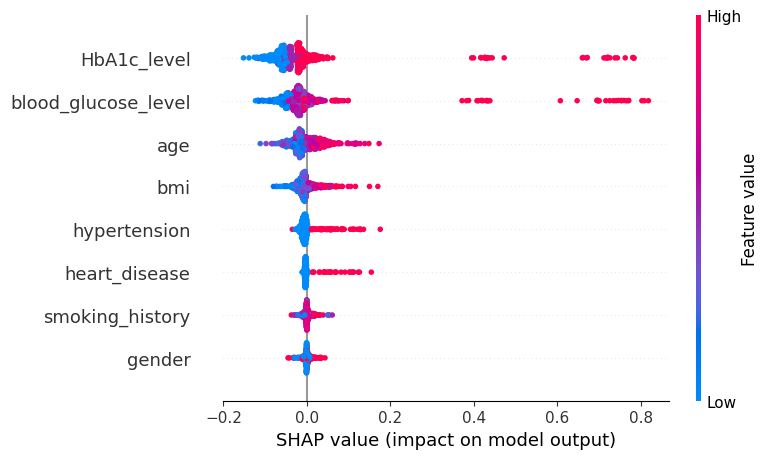

In [ ]:
plt.figure()
class_idx=1
shap.summary_plot(shap_values[:, :, class_idx], X_test, show=False)
plt.savefig("diabetes_shap_summary_plot.png", dpi=300, bbox_inches='tight')   # now works!
plt.show()

## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}
dt_random = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_random.fit(X_train, y_train)

dt_pred = dt_random.predict(X_test)

print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print(accuracy_score(y_test,dt_pred))
print(precision_score(y_test,dt_pred,average='weighted'))
print(recall_score(y_test,dt_pred,average='weighted'))
print(f1_score(y_test,dt_pred,average='weighted'))
print(dt_random.best_params_)

[[10616   791]
 [   58 11024]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11407
           1       0.93      0.99      0.96     11082

    accuracy                           0.96     22489
   macro avg       0.96      0.96      0.96     22489
weighted avg       0.96      0.96      0.96     22489

0.9622482102361154
0.9642532134248177
0.9622482102361154
0.9622258794320168
{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}


In [ ]:
dt = {'Accuracy Score': 96.22,
'Precision Score': 96.43,
'Recall Score': 96.22,
'F1 Score': 96.22}

## SVM

In [ ]:
from sklearn.svm import SVC

#before pca
svm = SVC()
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)

print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))
print(accuracy_score(y_test,svm_pred))
print(precision_score(y_test,svm_pred,average='weighted'))
print(recall_score(y_test,svm_pred,average='weighted'))
print(f1_score(y_test,svm_pred,average='weighted'))

[[10048  1359]
 [ 1101  9981]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     11407
           1       0.88      0.90      0.89     11082

    accuracy                           0.89     22489
   macro avg       0.89      0.89      0.89     22489
weighted avg       0.89      0.89      0.89     22489

0.8906131886700165
0.8908551162236905
0.8906131886700165
0.8906169273908424


In [ ]:
svm = {'Accuracy Score': 89.06,
'Precision Score': 89.09,
'Recall Score': 89.06,
'F1 Score': 89.06}

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(X_train,y_train)
# before pca
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))
print(precision_score(y_test,knn_pred,average='weighted'))
print(recall_score(y_test,knn_pred,average='weighted'))
print(f1_score(y_test,knn_pred,average='weighted'))

[[10813   594]
 [   88 10994]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11407
           1       0.95      0.99      0.97     11082

    accuracy                           0.97     22489
   macro avg       0.97      0.97      0.97     22489
weighted avg       0.97      0.97      0.97     22489

0.9696740628751834
0.9706457716531749
0.9696740628751834
0.9696685708671229


In [ ]:
knn= {'Accuracy Score': 96.97,
'Precision Score': 97.06,
'Recall Score': 96.97,
'F1 Score': 96.97}

## Stacking,not rf

## lr

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision (weighted):", precision_score(y_test, lr_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, lr_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, lr_pred, average='weighted'))


[[9947 1460]
 [1410 9672]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11407
           1       0.87      0.87      0.87     11082

    accuracy                           0.87     22489
   macro avg       0.87      0.87      0.87     22489
weighted avg       0.87      0.87      0.87     22489

Accuracy: 0.8723820534483525
Precision (weighted): 0.8723976186724305
Recall (weighted): 0.8723820534483525
F1 Score (weighted): 0.8723855235253064


In [ ]:
dt = {'Accuracy Score': 87.24,
'Precision Score': 87.24,
'Recall Score': 87.24,
'F1 Score': 87.23}

## stacking with rf

In [ ]:


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np


base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=1, weights='uniform')),
    ('rf', RandomForestClassifier())
]

# Define meta-model
meta_model = LogisticRegression()

# Create Stacking Classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train Stacking Model
stack_model.fit(X_train, y_train)

# Predict
stack_pred = stack_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, stack_pred))
print(classification_report(y_test, stack_pred))
print("Accuracy:", accuracy_score(y_test, stack_pred))
print("Precision (weighted):", precision_score(y_test, stack_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, stack_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, stack_pred, average='weighted'))





[[11157   122]
 [  469   904]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11279
           1       0.88      0.66      0.75      1373

    accuracy                           0.95     12652
   macro avg       0.92      0.82      0.86     12652
weighted avg       0.95      0.95      0.95     12652

Accuracy: 0.9532880177047107
Precision (weighted): 0.9511331793492546
Recall (weighted): 0.9532880177047107
F1 Score (weighted): 0.9502635553327219


/tmp/ipython-input-4-1028209962.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=models, y=scores, palette='Set2', width=0.9)
/tmp/ipython-input-4-1028209962.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models, rotation=45, ha='right', fontsize=7)
/tmp/ipython-input-4-1028209962.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=models, y=scores, palette='Set2', width=0.9)
/tmp/ipython-input-4-1028209962.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe

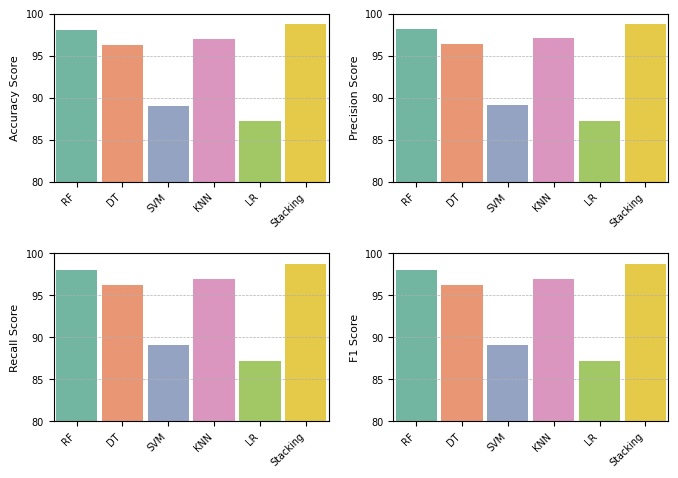

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated Data
results = {
    'RF': {'Accuracy Score': 98.05, 'Precision Score': 98.12, 'Recall Score': 98.05, 'F1 Score': 98.05},
    'DT': {'Accuracy Score': 96.22, 'Precision Score': 96.43, 'Recall Score': 96.22, 'F1 Score': 96.22},
    'SVM': {'Accuracy Score': 89.06, 'Precision Score': 89.09, 'Recall Score': 89.06, 'F1 Score': 89.06},
    'KNN': {'Accuracy Score': 96.97, 'Precision Score': 97.06, 'Recall Score': 96.97, 'F1 Score': 96.97},
    'LR': {'Accuracy Score': 87.24, 'Precision Score': 87.24, 'Recall Score': 87.24, 'F1 Score': 87.23},
    'Stacking': {'Accuracy Score': 98.78, 'Precision Score': 98.79, 'Recall Score': 98.78, 'F1 Score': 98.78}
}

# Plot all metrics in one figure with subplots
metrics = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
models = list(results.keys())

fig, axes = plt.subplots(2, 2, figsize=(7, 5))  # Adjust size for IEEE column width
axes = axes.flatten()

for i, metric in enumerate(metrics):
    scores = [results[model][metric] for model in models]
    sns.barplot(ax=axes[i], x=models, y=scores, palette='Set2', width=0.9)
    axes[i].set_ylabel(metric, fontsize=8)
    axes[i].set_xticklabels(models, rotation=45, ha='right', fontsize=7)
    axes[i].set_yticks(range(80, 101, 5))
    axes[i].set_ylim(80, 100)
    axes[i].tick_params(axis='y', labelsize=7)
    axes[i].grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=1.5)
plt.savefig('All_Metrics_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
stacking = {
    'Accuracy Score': 98.78,
    'Precision Score': 98.79,
    'Recall Score': 98.78,
    'F1 Score': 98.78

}